# BATHARA KURNIA GUSTI SUGRIAT

## Research question/interests

### How does game categories affects the ratings of a game?

#### A rare research insight on how gaming categories (i.e adventure, action) affects the ratings of a game.



## TASK 1

#### This is the summary (Range index, non-null counts, index Dtype, memory usage) of our dataframe/set:

In [107]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

df = pd.read_csv('../data/raw/android-games.csv')
df.info()
df.head()

df['rank'] = df['rank'].astype('str')

df['TR'] = df['total ratings'].astype('category')
df['AV'] = df['average rating'].astype('category')
df['5 star ratings'] = df['5 star ratings'].astype('category')
df['4 star ratings'] = df['4 star ratings'].astype('category')
df['3 star ratings'] = df['3 star ratings'].astype('category')
df['2 star ratings'] = df['2 star ratings'].astype(str).str.strip().astype('category')
df['1 star ratings'] = df['1 star ratings'].astype('category')
df['CT'] = df['category'].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


#### These are the types of datas in python language of our dataframe


In [108]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   rank              1730 non-null   object  
 1   title             1730 non-null   object  
 2   total ratings     1730 non-null   int64   
 3   installs          1730 non-null   object  
 4   average rating    1730 non-null   int64   
 5   growth (30 days)  1730 non-null   float64 
 6   growth (60 days)  1730 non-null   float64 
 7   price             1730 non-null   float64 
 8   category          1730 non-null   object  
 9   5 star ratings    1730 non-null   category
 10  4 star ratings    1730 non-null   category
 11  3 star ratings    1730 non-null   category
 12  2 star ratings    1730 non-null   category
 13  1 star ratings    1730 non-null   category
 14  paid              1730 non-null   bool    
 15  TR                1730 non-null   category
 16  AV                1730 n

#### These are the first five games in our dataframe:

In [109]:

df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,TR,AV,CT
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False,86273129,4,GAME ACTION
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False,37276732,4,GAME ACTION
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False,26663595,4,GAME ACTION
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False,17971552,4,GAME ACTION
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False,14464235,4,GAME ACTION


#### And these are the last five games in our dataframe:

In [110]:

df.tail()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,TR,AV,CT
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False,112408,4,GAME WORD
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False,111595,4,GAME WORD
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False,110723,4,GAME WORD
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False,109530,4,GAME WORD
1729,100,Pinturillo 2,108917,10.0 M,3,1.1,2.5,0.0,GAME WORD,50813,16480,11825,6166,23631,False,108917,3,GAME WORD


#### These are the names of every columns in our dataframe:

In [111]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid', 'TR', 'AV', 'CT'],
      dtype='object')

#### The next table describes the basic statistics of our numerical parts of the dataset. These includes the average values of each columns (for example, the average rating for all games on this list is about 3.9 star, ranging from 1 to 5 stars).
#### These are the complete explanation regarding each column:

#### Count = Total rumber of Rows for a column.

#### Mean = Average value of a data (Total numerical value of the column divided by how many datas are there in that column)

#### Std = Standard Deviation tells us how far data points scattered relating to our Mean value. High standard deviation i.e as the std for Total Ratings) means lots of datas are scattered far away from its mean value of 1.064e+06.

#### Min = The absolute minimum value in that column.

#### Max = The absolute maximum value in that column.

#### 25% = This tells us how many values are less than 25% percent.

#### 50% = This tells us how many values are less than 50% percent.

#### 75% = This tells us how many values are less than 75% percent.

In [112]:
pd.set_option('precision', 3)
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
total ratings,1730.0,1.064e+06,3.429e+06,32993.0,175999.25,428606.5,883797.0,8.627e+07
average rating,1730.0,3.908e+00,2.910e-01,2.0,4.00,4.0,4.0,4.000e+00
growth (30 days),1730.0,3.217e+02,6.019e+03,0.0,0.10,0.5,1.7,2.271e+05
growth (60 days),1730.0,1.226e+02,2.254e+03,0.0,0.20,1.0,3.3,6.944e+04
price,1730.0,1.094e-02,2.150e-01,0.0,0.00,0.0,0.0,7.490e+00


#### These are the total number of NaN datas in each column (NaN = Unavailable Datas):

#### For our dataset, there's no Unavailable Datas.

In [113]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
TR                  0
AV                  0
CT                  0
dtype: int64

#### And Last but not Least, the Correlation heatmap. For my research question, we will focus on columns related to ratings, including the total ratings, the average rating, and the ratings of each star.

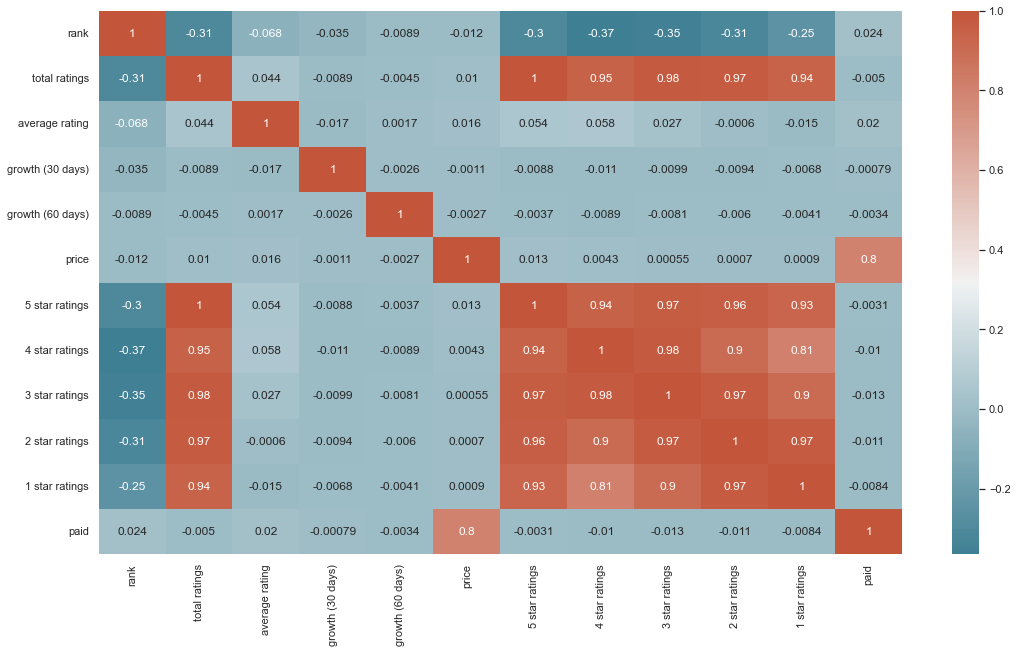

In [134]:
df = pd.read_csv('../data/raw/android-games.csv')

corrmap = df.corr()
sns.heatmap(corrmap, xticklabels = corrmap.columns, yticklabels = corrmap.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.set(rc = {'figure.figsize':(18,10)}, style = 'white')

## TASK 2

#### Load Data

In [145]:
df = pd.read_csv('../data/raw/android-games.csv')

df


,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False


### Cleaning the Data


#### *Mr. Clean clean the data*


#### *Mr. Clean wipe unecessary stuff*

In [146]:
df_clean = df.drop(["installs","growth (30 days)","growth (60 days)", "price", "paid"], axis=1)
df_clean

,rank,title,total ratings,average rating,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,1,Garena Free Fire- World Series,86273129,4,GAME ACTION,63546766,4949507,3158756,2122183,12495915
1,2,PUBG MOBILE - Traverse,37276732,4,GAME ACTION,28339753,2164478,1253185,809821,4709492
2,3,Mobile Legends: Bang Bang,26663595,4,GAME ACTION,18777988,1812094,1050600,713912,4308998
3,4,Brawl Stars,17971552,4,GAME ACTION,13018610,1552950,774012,406184,2219794
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,4,GAME ACTION,9827328,2124154,1047741,380670,1084340
...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,4,GAME WORD,101036,3607,3237,1229,3297
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,4,GAME WORD,88950,14856,4297,1385,2103
1727,98,Scrabble® GO - New Word Game,110723,4,GAME WORD,64184,18332,9385,6688,12132
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,4,GAME WORD,99987,4766,1469,953,2353


### Data Wrangling

#### We then wrangle the data by sorting its values

In [147]:
df_sort = df_clean.sort_values("category").reset_index(drop=True)

df_sort

,rank,title,total ratings,average rating,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,1,Garena Free Fire- World Series,86273129,4,GAME ACTION,63546766,4949507,3158756,2122183,12495915
1,73,Deer Hunter 2018,1023162,4,GAME ACTION,637243,120170,62893,33380,169472
2,72,DRAGON BALL Z DOKKAN BATTLE,1066554,4,GAME ACTION,795922,118008,40491,18831,93301
3,71,Rope Hero: Vice Town,1070197,4,GAME ACTION,758309,80160,55138,37528,139060
4,70,PUBG MOBILE,1073769,4,GAME ACTION,839876,56847,34971,22041,120032
...,...,...,...,...,...,...,...,...,...,...
1725,28,Word Connect - Word Games Puzzle,427255,4,GAME WORD,339689,43523,20765,6855,16421
1726,27,Word Collect - Free Word Games,436327,4,GAME WORD,395758,20443,5961,3503,10659
1727,25,4 Bilder 1 Wort,447182,4,GAME WORD,268217,99646,32509,13708,33099
1728,49,Palabras Cruz,264230,4,GAME WORD,217546,20368,8725,4167,13422


### Data Processing

#### Then we Process the data by renaming its columns to provide better output view

In [136]:

df_rename = df_sort.rename(columns=
            {"total ratings": "Total amount of raters",
            "5 star ratings": "5 stars",
            "4 star ratings": "4 stars",
            "3 star ratings": "3 stars",
            "2 star ratings": "2 stars",
            "1 star ratings": "1 star",
            "rank": "Rank of game in Google Playstore"})

df_rename

,Rank of game in Google Playstore,title,Total amount of raters,average rating,category,5 stars,4 stars,3 stars,2 stars,1 star
0,1,Garena Free Fire- World Series,86273129,4,GAME ACTION,63546766,4949507,3158756,2122183,12495915
1,73,Deer Hunter 2018,1023162,4,GAME ACTION,637243,120170,62893,33380,169472
2,72,DRAGON BALL Z DOKKAN BATTLE,1066554,4,GAME ACTION,795922,118008,40491,18831,93301
3,71,Rope Hero: Vice Town,1070197,4,GAME ACTION,758309,80160,55138,37528,139060
4,70,PUBG MOBILE,1073769,4,GAME ACTION,839876,56847,34971,22041,120032
...,...,...,...,...,...,...,...,...,...,...
1725,28,Word Connect - Word Games Puzzle,427255,4,GAME WORD,339689,43523,20765,6855,16421
1726,27,Word Collect - Free Word Games,436327,4,GAME WORD,395758,20443,5961,3503,10659
1727,25,4 Bilder 1 Wort,447182,4,GAME WORD,268217,99646,32509,13708,33099
1728,49,Palabras Cruz,264230,4,GAME WORD,217546,20368,8725,4167,13422


## TASK 3

#### The First task is to make and test our method chain function.

In [119]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv('../data/raw/android-games.csv')
          .dropna(how="any")
          .sort_values("category")
          .reset_index(drop=True)
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
      )

    # Make sure to return the latest dataframe

    return df2 

load_and_process('../data/raw/android-games.csv')

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,73,Deer Hunter 2018,1023162,50.0 M,4,0.0,0.1,0.0,GAME ACTION,637243,120170,62893,33380,169472,False
2,72,DRAGON BALL Z DOKKAN BATTLE,1066554,10.0 M,4,0.5,0.9,0.0,GAME ACTION,795922,118008,40491,18831,93301,False
3,71,Rope Hero: Vice Town,1070197,100.0 M,4,2.6,5.6,0.0,GAME ACTION,758309,80160,55138,37528,139060,False
4,70,PUBG MOBILE,1073769,10.0 M,4,2.7,4.5,0.0,GAME ACTION,839876,56847,34971,22041,120032,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,28,Word Connect - Word Games Puzzle,427255,10.0 M,4,0.8,1.8,0.0,GAME WORD,339689,43523,20765,6855,16421,False
1726,27,Word Collect - Free Word Games,436327,10.0 M,4,3.1,7.2,0.0,GAME WORD,395758,20443,5961,3503,10659,False
1727,25,4 Bilder 1 Wort,447182,10.0 M,4,0.2,0.4,0.0,GAME WORD,268217,99646,32509,13708,33099,False
1728,49,Palabras Cruz,264230,10.0 M,4,0.4,1.1,0.0,GAME WORD,217546,20368,8725,4167,13422,False


#### Afterwards, we copy and paste the same function to a new .py file called project_function_3. We will then import that function module into here.

In [135]:
import project_function_3
df = project_function_3.load_and_process('../data/raw/android-games.csv')
df

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,39,バンドリ！ ガールズバンドパーティ！,127314,1.0 M,4,0.4,1.0,0.0,GAME MUSIC,90009,16965,7215,3373,9750,False
1,99,원피스 트레저 크루즈,281148,1.0 M,4,0.0,0.0,0.0,GAME ROLE PLAYING,208788,37624,15607,3864,15262,False
2,98,"Fairy Tales ~ Children’s Books, Stories and Games",51002,1.0 M,4,1.0,1.7,0.0,GAME EDUCATIONAL,38219,6460,2431,982,2907,False
3,74,Popscene (Music Industry Sim),53142,1.0 M,3,0.5,1.1,0.0,GAME MUSIC,27811,6397,5002,3188,10741,False
4,30,Casino Jackpot Slots - Infinity Slots™ 777 Game,367694,1.0 M,4,0.1,0.1,0.0,GAME CASINO,278174,55844,18491,4517,10665,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,77,SuperStar YG,48198,500.0 k,4,3.9,10.7,0.0,GAME MUSIC,37036,5112,2158,1334,2556,False
1726,70,SHOW BY ROCK!![爽快音ゲー ショウバイロック］,55357,500.0 k,4,0.0,0.0,0.0,GAME MUSIC,30635,15762,5493,1738,1728,False
1727,87,Slots on Tour Casino - Vegas Slot Machine Game...,99082,500.0 k,4,0.1,0.2,0.0,GAME CASINO,78458,14511,3405,749,1957,False
1728,85,90's Quiz Game,47912,500.0 k,4,0.0,0.0,0.0,GAME TRIVIA,40057,4661,2300,347,545,False


## TASK 4

### Here we will conduct our analysis and finally answer my research question (How does game categories affects the ratings of a game?)

#### First of all, we will define three graphs, based on the amount of ratings and game categories. The first one would be the five star ratings (maximum amount of star you can give to rate). 

#### NOTE: We are going to use the dataset that we have wrangled and processed back in Task 2.

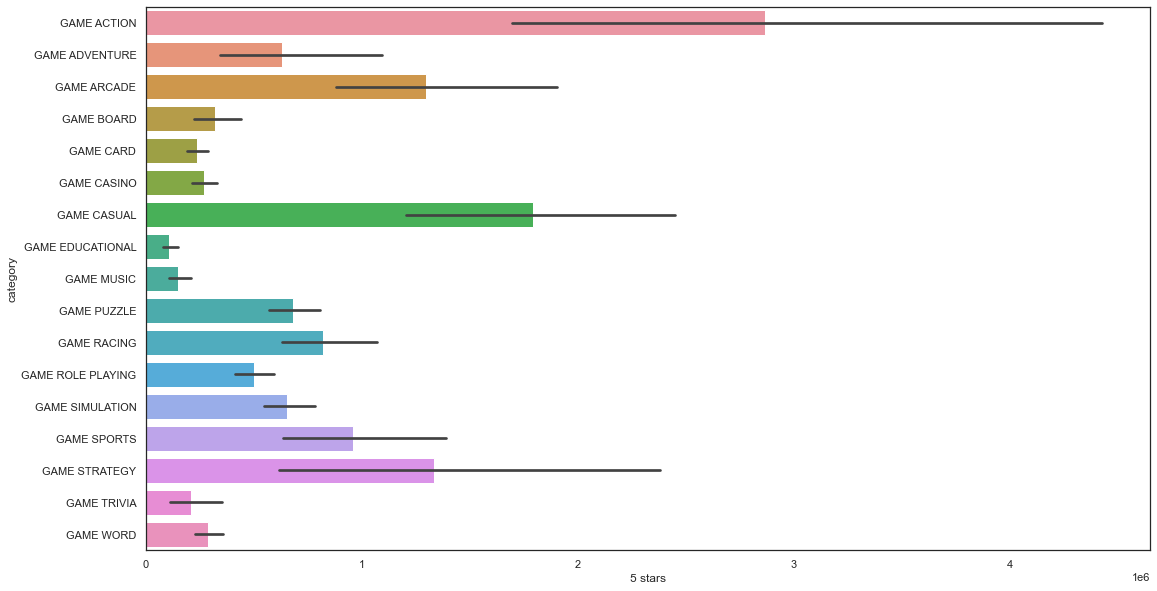

In [137]:
# make seaborn barplot
sns.barplot(x = '5 stars', y = 'category', data = df_rename)
 
# Show the plot
plt.show()

#### From the first graph, we can conclude that Action Games wins the medal in most 5 star ratings, followed second by Casual, then Strategy/RTS. 

#### But now we're going to graph three star ratings (median point of star you can give) against each game categories and see in another perspective:

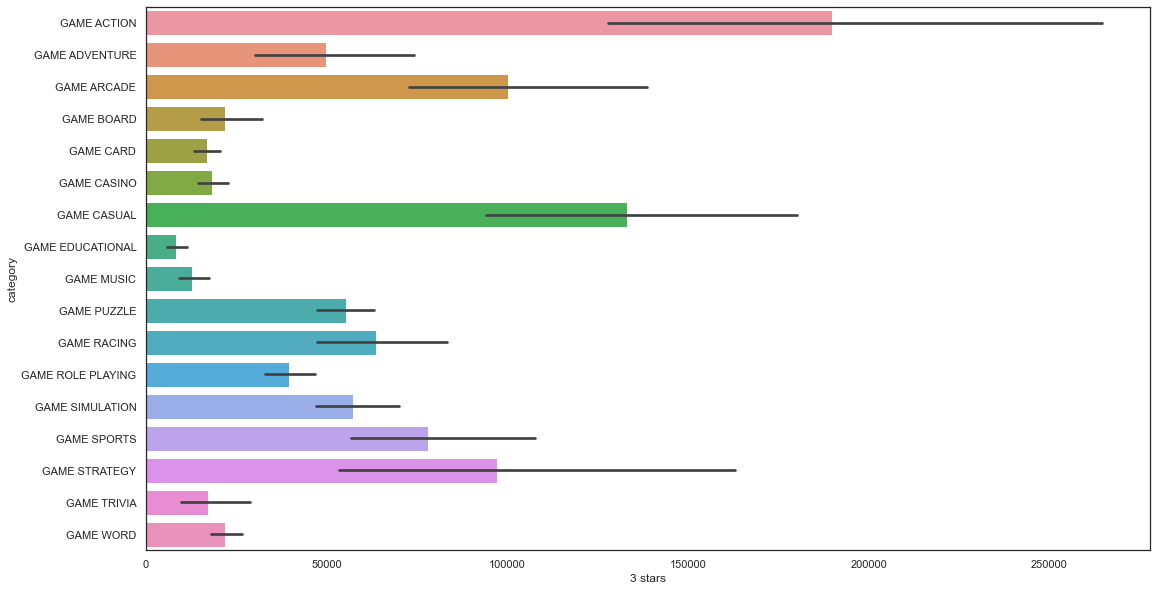

In [138]:
# make seaborn barplot
sns.barplot(x = '3 stars', y = 'category', data = df_rename)
 
# Show the plot
plt.show()

#### It seems that three star ratings also have the previous trios as the winner. This means that lots of people rated Action, Casual, and RTS games as both 5 stars and 3 stars. This means that none of these categories actually excels against other types of games, they just have lots of more people to play and rate.

#### Last but not least, we're going to graph the minimum amount of stars you can give (1 star) against each game categories:

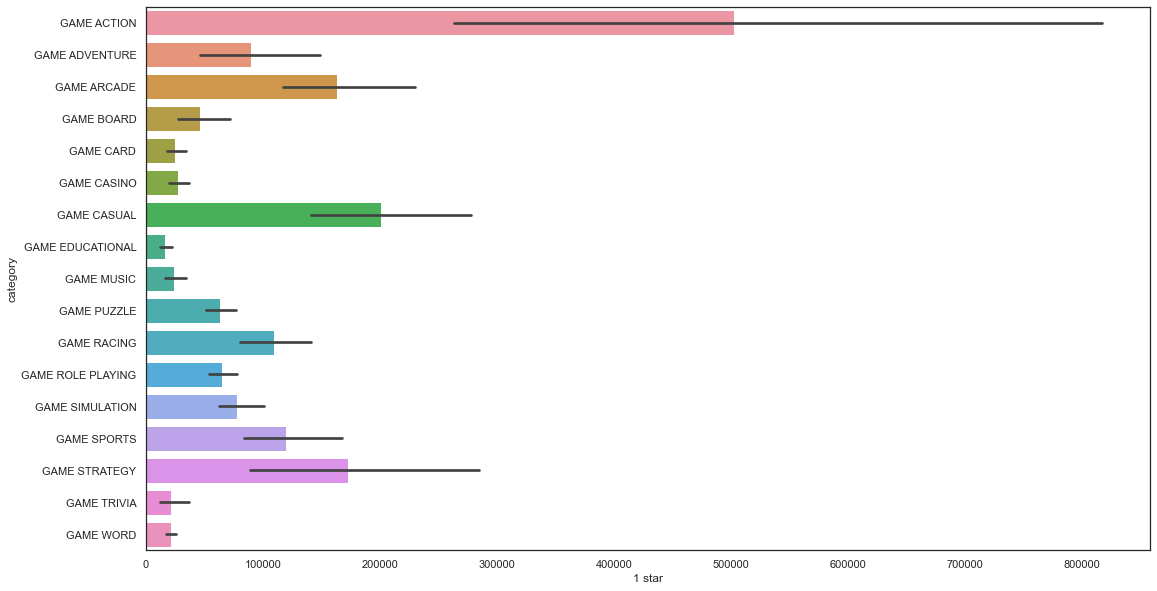

In [139]:
# make seaborn barplot
sns.barplot(x = '1 star', y = 'category', data = df_rename)
 
# Show the plot
plt.show()

#### From the previous 3 graphs, it seems like the all three have similar plottings, with Action Games having the most ratings, and Educational Games the least. Unfortunately this means that while Action Games has the highest 5 stars, but it also highest 1 stars. This nullifies the hypothesis that Action Games have the highest ratings overall comparing to other categories, just because it has higher ratings in the 5 stars graph.

#### To verify this, we will show the Average Ratings for each Game Categories:

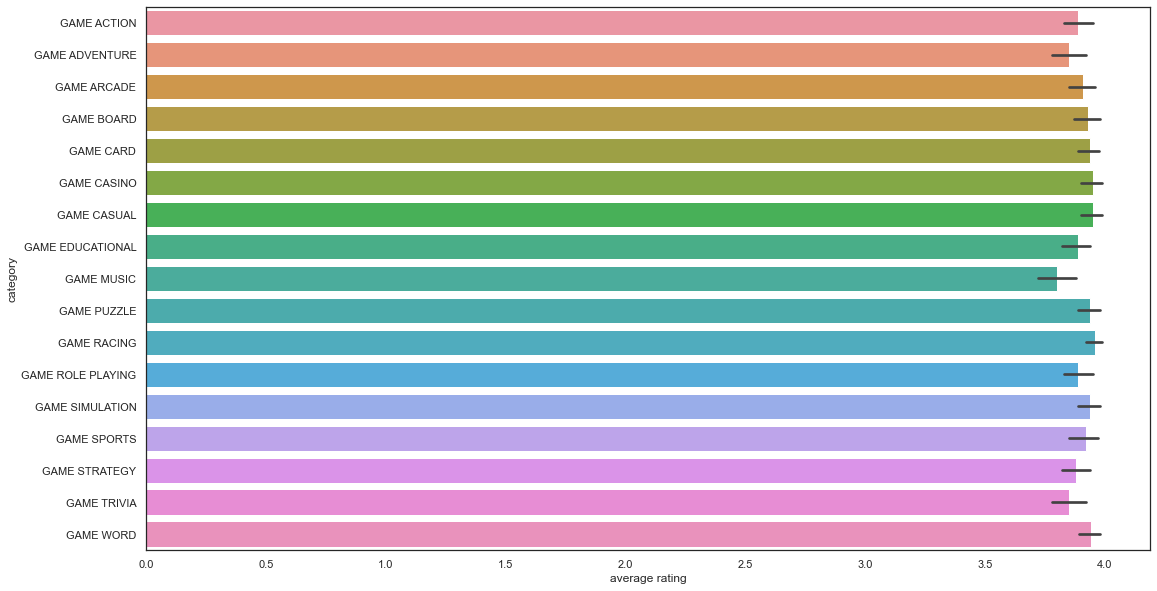

In [124]:
# make seaborn barplot
sns.barplot(x = 'average rating', y = 'category', data = df_rename)
 
# Show the plot
plt.show()

#### As we might have predicted, every game category have similar average ratings. There is at most a range of 0.16 stars between the highest category (Action) and lowest (Music). Quite a trivial difference.

#### Now we take a look at how many people rate for each game category:

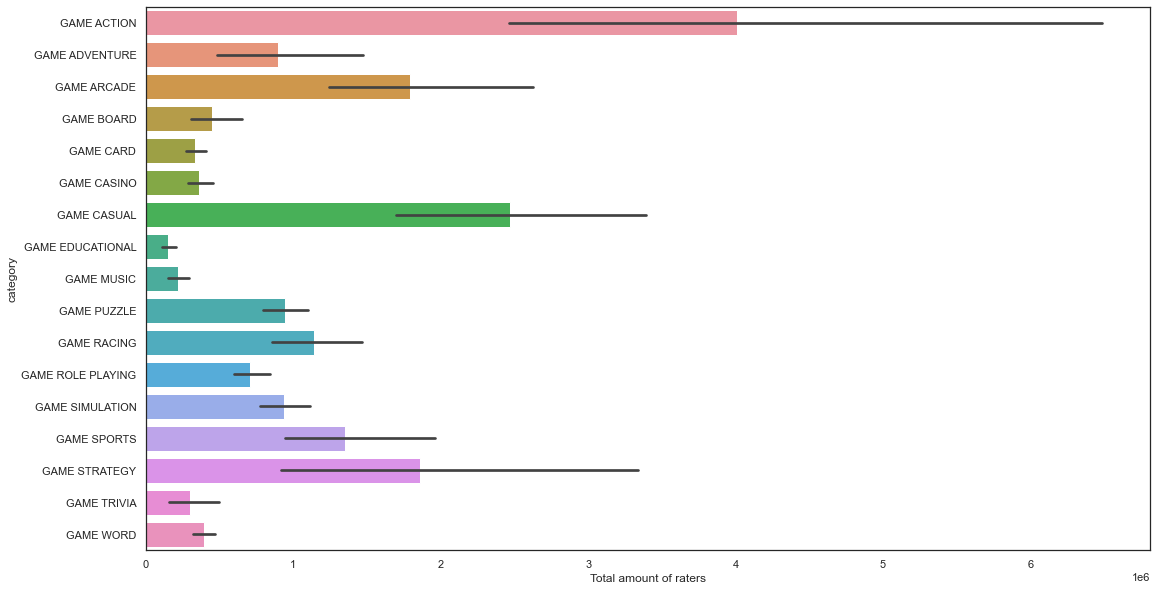

In [143]:
# make seaborn barplot
sns.barplot(x = 'Total amount of raters', y = 'category', data = df_rename)
 
# Show the plot
plt.show()

#### From this graph, it shows how the trios (Action, Casual, Strategy) have indeed have the biggest amount of raters. This explains how Action games have the most raters in all 1, 3, and 5 star graphs, while educational and music have the least values in every graph. Although we might be able to prove that the total amount of raters correlates proportionally with for each star, instead to the game's category.

#### This might be confusing, so lets take a sample scatter plot between the amount of raters and the number of 3 and 5 stars:


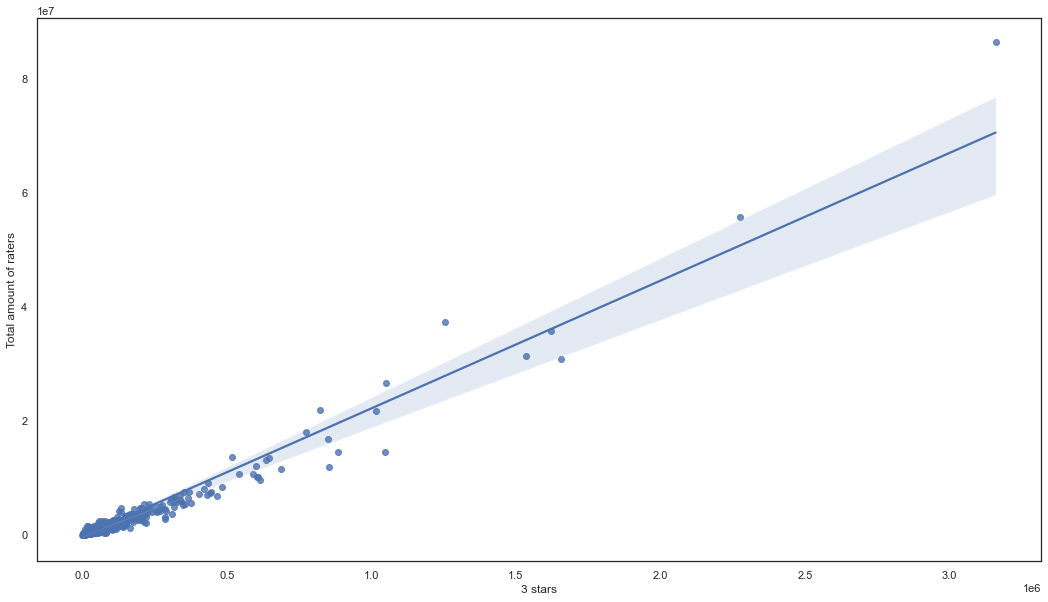

In [151]:
x = sns.regplot(x = '3 stars', y = 'Total amount of raters', data = df_rename)

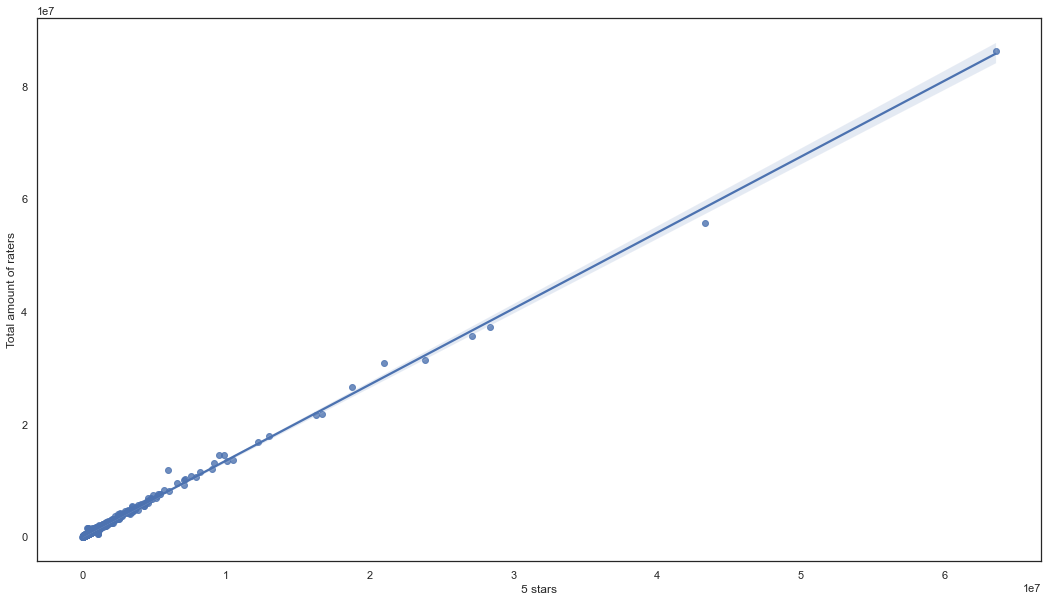

In [152]:
x = sns.regplot(x = '5 stars', y = 'Total amount of raters', data = df_rename)

#### With the exception of outliners, most of the data points for both 5 stars & 3 stars vs Total Amount of Raters are near the  line and inside the standard deviation shade, proving our previous statement that the amount of raters are proportionally related to the amount of stars given.

#### Note: The Line itself is a plot generated line explaining the relationship between 2 variables. The more data points that's closer to the line, the more correlated the two datas are.


# Conclusion

### According to our analysis, we found out that a Game's Category DOES NOT have a consequential impact upon its ratings. 

#### We found out that Action Games seems to 'top' the list as the highest average rating, with music being the lowest with a rating difference of 0.16 stars. This is however too small and insignificant of a change (comparing to an average of 0.50/half a star when someone rates on Google or Apple Play Stores). Another non-numerical reason to why a game category doesn't impact its rating is because all graphs for each star ratings gives similar output, cancelling out the hypotesis that a game category excells against the other. i.e Action itself is both the most liked (5 stars) and hated (1 star) category.

#### Our analysis however, founds out that the the total amount of raters is proportionally correlated with the amount of each star. That is outside the scope of our research question, but would be useful for another research.